<a href="https://colab.research.google.com/github/kiranmunugoti/Python_DS/blob/main/Bankruptcy_EDA_Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bankruptcy EDA Analysis — Project Template

**Student Name:** Sai Kiran Munugoti

**Date:** 11/2/26

## Objective
Perform Exploratory Data Analysis (EDA) on the Bankruptcy dataset to:
- Understand the data (shape, types, missing values, duplicates)
- Explore target distribution and class imbalance
- Analyze distributions, outliers, correlations
- Identify key drivers of bankruptcy risk
- Summarize insights & recommendations


## 1) Setup & Imports


In [1]:
# Importing the required libraries for the Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200) # Max columns before truncating
pd.set_option('display.width', 200) # Max characters in a cell before wrapping


## 2) Load Dataset


In [ ]:
# Mounting google drive to colab to extract data
from google.colab import drive
drive.mount('/content/drive')

In [9]:
# Importing the bank data from the CSV file

bank = pd.read_csv(r"/content/drive/MyDrive/Jul_2025_GenAI/Bankruptency/Dataset.csv")
bank.head(10) # Displaying top 10 results of the data


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025

## 3) Quick Overview


In [10]:
# Shape: (rows, columns)
bank.shape

(6819, 96)

In [11]:
# Basic info (dtypes, non-null counts)
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [12]:
# Summary stats
bank.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


## Data Quality Check

In [13]:
#Finding the missing values in the data
bank.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [14]:
#Finding the duplicate values in the data
bank.duplicated().sum()

np.int64(0)

## 4) Identify Target Column


### Task
- Identify your **target column** (Bankruptcy: Yes/No or 1/0).
- Confirm what values represent **Bankrupt** and **Non-Bankrupt**.


In [15]:
# Rename the target column to avoid complications
bank = bank.rename(columns={'Bankrupt?': 'Bankrupt'})

# Display the first 5 rows to confirm the change
display(bank.head())

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.00688

In [19]:
# Removing the un-necessacry spaces in the column names
bank.columns = bank.columns.str.strip()

In [16]:
# Assigning the Target column
TARGET_COL = "Bankrupt"

# Finding out the number of bankrupt and non-bankrupt companies in data.
# 0 represnets non-bankrupt and 1 represents bankrupt
bank[TARGET_COL].value_counts(dropna=False)


,count
Bankrupt,
0,6599
1,220


The classification count of the target varibale is imbalanced with a high chance of providing biased results based on the given data.

In [20]:
# Class proportion
bank[TARGET_COL].value_counts(normalize=True, dropna=False)

,proportion
Bankrupt,
0,0.967737
1,0.032263


### Target Distribution Chart


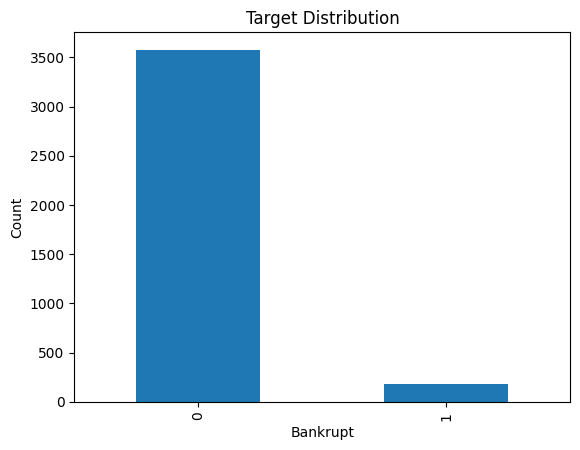

In [ ]:
# Visually presenting the class distribution of the data in target column
bank[TARGET_COL].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.xlabel(TARGET_COL)
plt.ylabel("Count")
plt.show()


## 5) Data Quality Checks


### 5.1 Missing Values


In [21]:
# Missing values count and %
missing = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": df.isna().mean()*100
}).sort_values("missing_pct", ascending=False)

missing.head(20)


,missing_count,missing_pct
Bankrupt?,0,0.0
ROA(C) before interest and depreciation before interest,0,0.0
ROA(A) before interest and % after tax,0,0.0
ROA(B) before interest and depreciation after tax,0,0.0
Operating Gross Margin,0,0.0
Realized Sales Gross Margin,0,0.0
Operating Profit Rate,0,0.0
Pre-tax net Interest Rate,0,0.0
After-tax net Interest Rate,0,0.0
Non-industry income and expenditure/revenue,0,0.0


**Replacing missing values**
Missing values can be in different ways:


*   With advance methods like regression or itterative imputation
*   With Mean, Median, and Mode



In [ ]:
# Replacing the missing values with median because the data is not completely categorical
#and given the condition of not having a balanced data in the target column and the size
# of the data Median is best suited in this case.
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
#df['col'] = df['col'].fillna(df['col'].median())


### 5.2 Duplicate Rows


In [ ]:
# Check the total count of missing values in the DataFrame
total_missing_values = df.isnull().sum().sum()
print(f"Total missing values remaining in the DataFrame: {total_missing_values}")

Total missing values remaining in the DataFrame: 0


In [ ]:
#Counting the total duplicate values in the data
dup_count = df.duplicated().sum()
dup_count


np.int64(0)

In [ ]:
# There are no duplicates to recheck
# df = df.drop_duplicates()
# df.duplicated().sum()


### 5.3 Data Types & Fixes


In [ ]:
# Check dtypes
df.dtypes.value_counts()


,count
float64,95
int64,1


Convert columns (e.g., numeric stored as text, date parsing).
(Not required as the columns are in numerical format)


In [ ]:
# Example:
# df['date_col'] = pd.to_datetime(df['date_col'], errors='coerce')
# df['numeric_col'] = pd.to_numeric(df['numeric_col'], errors='coerce')


## 6) Univariate Analysis (Single Feature)


### Tasks
- For numeric columns: distribution + summary stats + skew
- For categorical columns: frequency counts + rare categories


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

len(num_cols), len(cat_cols), num_cols[:10], cat_cols[:10]


(96,
 0,
 ['Bankrupt',
  ' ROA(C) before interest and depreciation before interest',
  ' ROA(A) before interest and % after tax',
  ' ROA(B) before interest and depreciation after tax',
  ' Operating Gross Margin',
  ' Realized Sales Gross Margin',
  ' Operating Profit Rate',
  ' Pre-tax net Interest Rate',
  ' After-tax net Interest Rate',
  ' Non-industry income and expenditure/revenue'],
 [])

### 6.1 Numeric Distributions


In [ ]:
correlations = df[num_cols].corrwith(df[TARGET_COL]).sort_values(ascending=False)
correlations = correlations.drop(TARGET_COL)

print("Correlations with Bankrupt target variable:")
print(correlations.head(10))
print(correlations.tail(10))

Correlations with Bankrupt target variable:
Debt ratio %                           0.269861
Current Liability to Assets            0.206698
Borrowing dependency                   0.181329
Equity to Long-term Liability          0.173808
Liability to Equity                    0.168525
Current Liability to Current Assets    0.153761
Liability-Assets Flag                  0.148403
Current Liabilities/Equity             0.146380
Current Liability to Equity            0.146380
Total expense/Assets                   0.122143
dtype: float64
Retained Earnings to Total Assets                         -0.207532
Per Share Net profit before tax (Yuan ¥)                  -0.245349
Net profit before tax/Paid-in capital                     -0.260733
Net worth/Assets                                          -0.269861
Persistent EPS in the Last Four Seasons                   -0.279488
ROA(C) before interest and depreciation before interest   -0.285287
ROA(B) before interest and depreciation after tax    

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


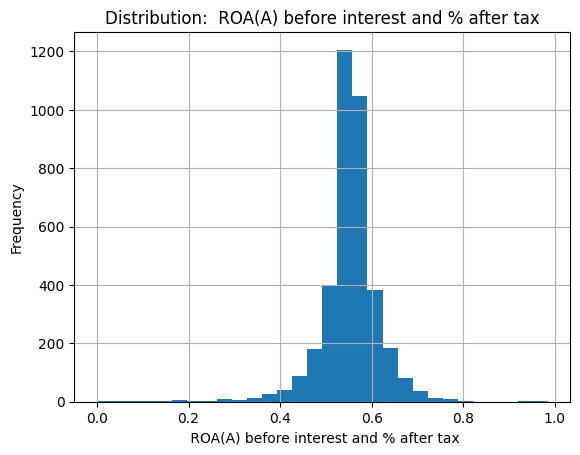

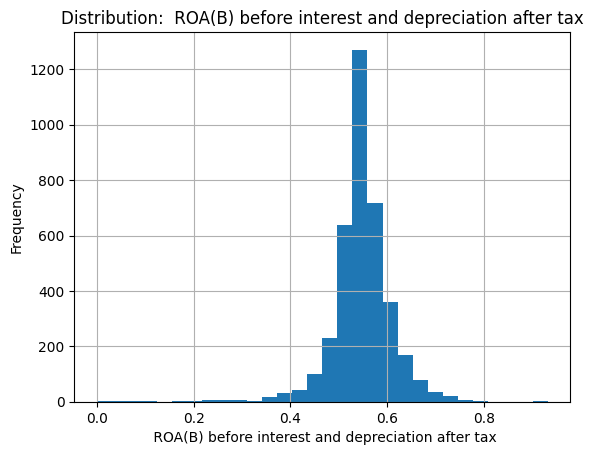

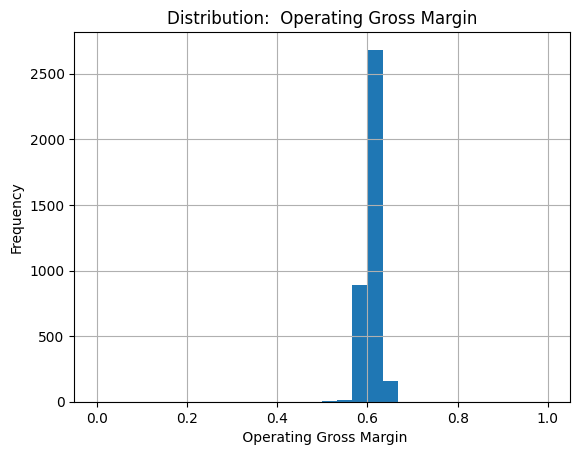

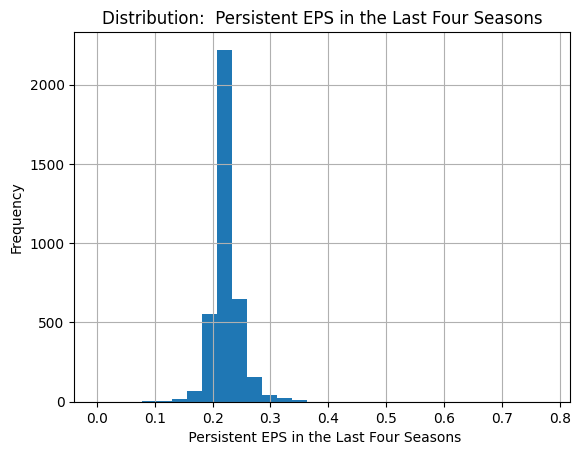

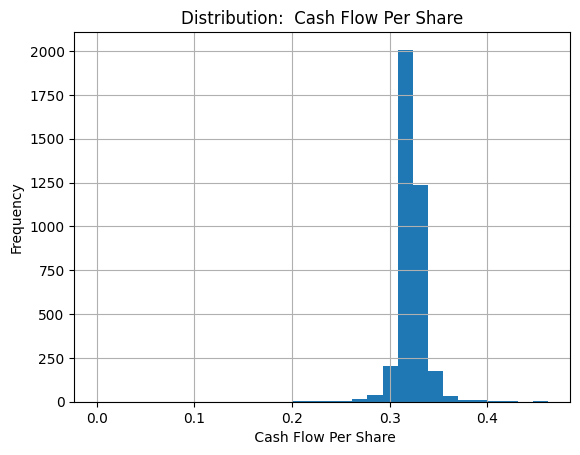

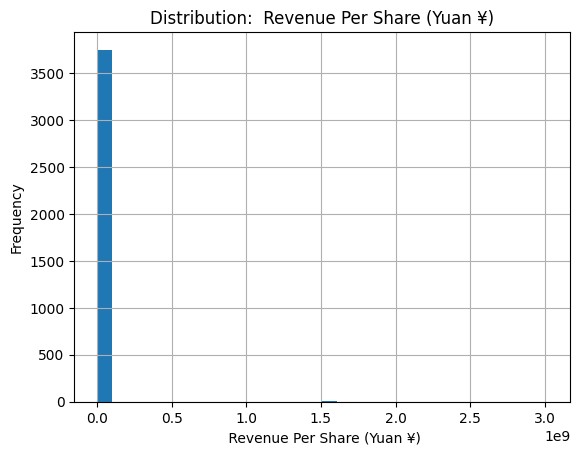

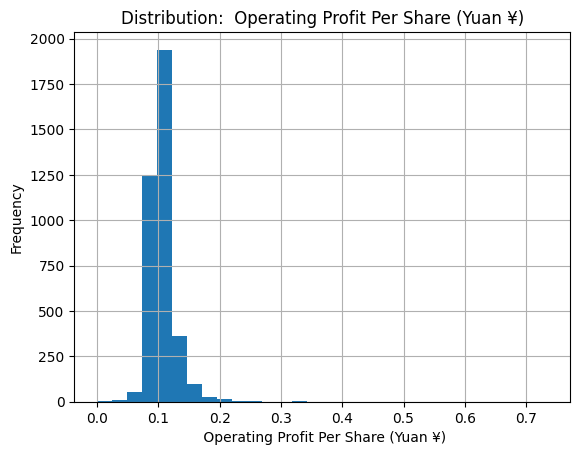

In [ ]:
# important numeric features and plot their distributions
positive_impact_cols = num_cols[2:5]  # change this list
negative_impact_cols = num_cols[19:23]
features_to_plot = positive_impact_cols + negative_impact_cols
for col in features_to_plot:
    df[col].hist(bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### 6.2 Categorical Distributions (if any)


In [ ]:
#For categorical columns, show counts
for col in cat_cols[:5]:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))


## 7) Bivariate Analysis (Feature vs Target)


### Tasks
- Numeric vs Target: boxplot/violin + group stats (mean/median)
- Categorical vs Target: cross-tab and percentages


### 7.1 Numeric vs Target (Group Statistics)


In [ ]:
# Choose important features that impact the bankrupt scenario vs non-bankrupt scenario
selected_features = sample_num_cols  # update

group_stats = df.groupby(TARGET_COL)[selected_features].agg(['mean','median','std'])
group_stats


ROA(B) before interest and depreciation after tax                     Operating Gross Margin                     Realized Sales Gross Margin                     Operating Profit Rate  \
                                                      mean    median       std                   mean    median       std                        mean    median       std                  mean   
Bankrupt                                                                                                                                                                                          
0                                                 0.552069  0.549173  0.057302               0.608200  0.606048  0.019609                    0.608181  0.606055  0.019602              0.998821   
1                                                 0.467459  0.492692  0.090503               0.599011  0.598913  0.014599                    0.599049  0.598964  0.014580              0.998725   

                             Pre-tax net Interest Rate                     After-tax net Interest Rate                     Non-industry income and expenditure/revenue                      
            median       std                      mean    median       std                        mean    median       std                                        mean    median       std  
Bankrupt                                                                                                                                                                                    
0         0.999021  0.006579                  0.797256  0.797458  0.011316                    0.809122  0.809370  0.014007                                    0.303602  0.303522  0.009156  
1         0.998906  0.000779                  0.796498  0.797160  0.003531                    0.808311  0.809093  0.004644                                    0.302478  0.303350  0.005675

### 7.2 Numeric vs Target (Boxplots)


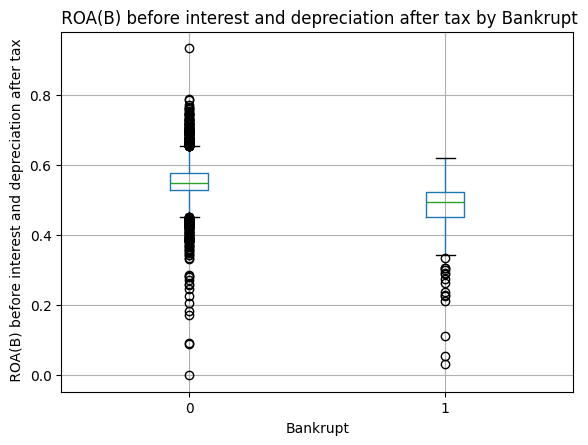

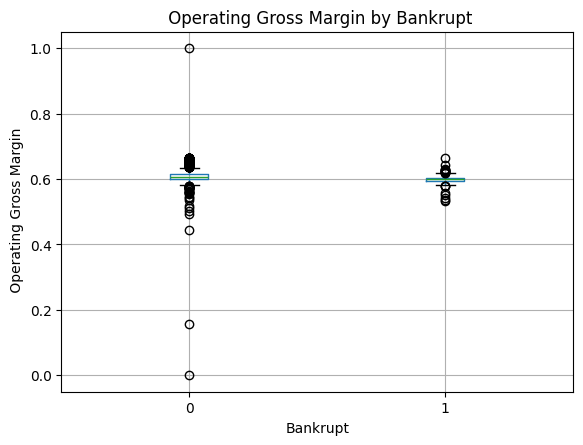

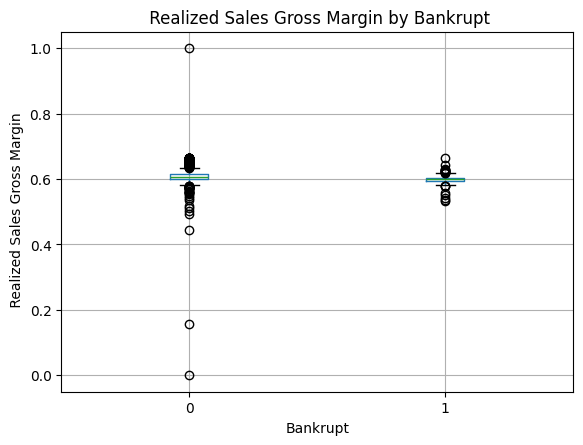

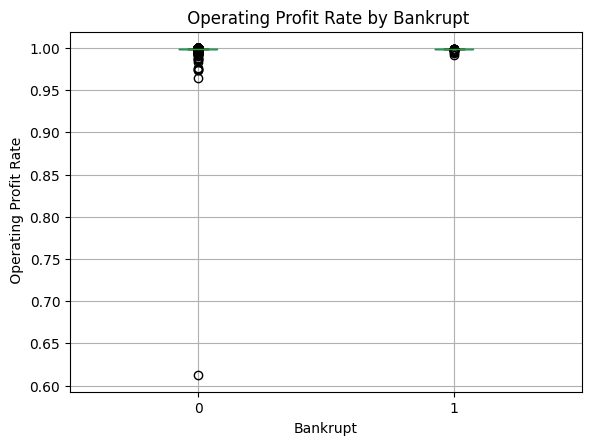

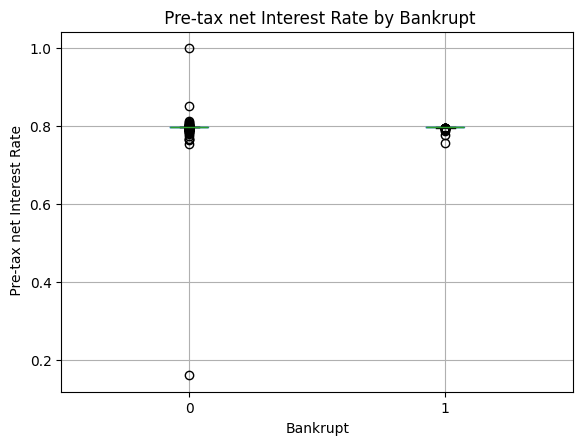

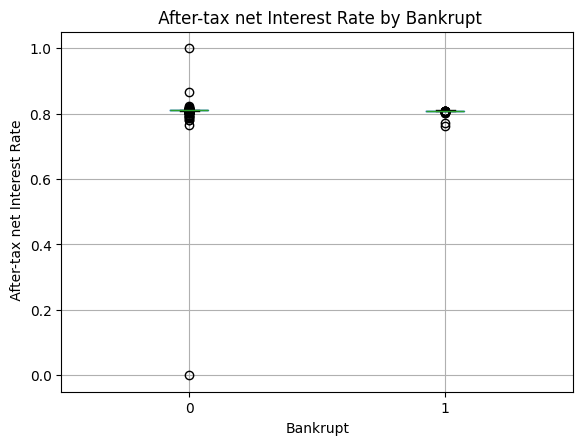

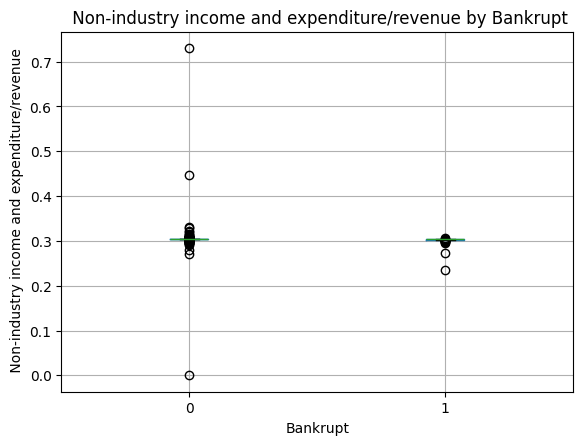

In [ ]:
# Boxplots (one-by-one) for selected numeric features
for col in selected_features:
    df.boxplot(column=col, by=TARGET_COL)
    plt.title(f"{col} by {TARGET_COL}")
    plt.suptitle("")
    plt.xlabel(TARGET_COL)
    plt.ylabel(col)
    plt.show()


### 7.3 Categorical vs Target (Cross-tab)


In [ ]:
# TODO: If you have categorical columns, compute cross-tab with target
# Example:
# pd.crosstab(df['some_cat_col'], df[TARGET_COL], normalize='index')


## 8) Outlier Analysis


### Tasks
- Detect outliers (IQR or percentile method)
- Decide: keep / cap (winsorize) / remove
- Explain your decision with business/logic reasoning


In [ ]:
# IQR outlier summary for selected features
outlier_summary = []
for col in selected_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary.append([col, outliers, lower, upper])

pd.DataFrame(outlier_summary, columns=["feature","outlier_count","lower_bound","upper_bound"]).sort_values("outlier_count", ascending=False)


,feature,outlier_count,lower_bound,upper_bound
6,Non-industry income and expenditure/revenue,637,0.303281,0.303749
5,After-tax net Interest Rate,562,0.809088,0.809671
4,Pre-tax net Interest Rate,503,0.797112,0.797827
3,Operating Profit Rate,425,0.998775,0.999275
0,ROA(B) before interest and depreciation after...,292,0.445902,0.653622
2,Realized Sales Gross Margin,188,0.579531,0.634677
1,Operating Gross Margin,185,0.579552,0.634699


## 9) Correlation & Multicollinearity


In [ ]:
# Correlation among numeric columns
corr = df[num_cols].corr()
corr.shape


(96, 96)

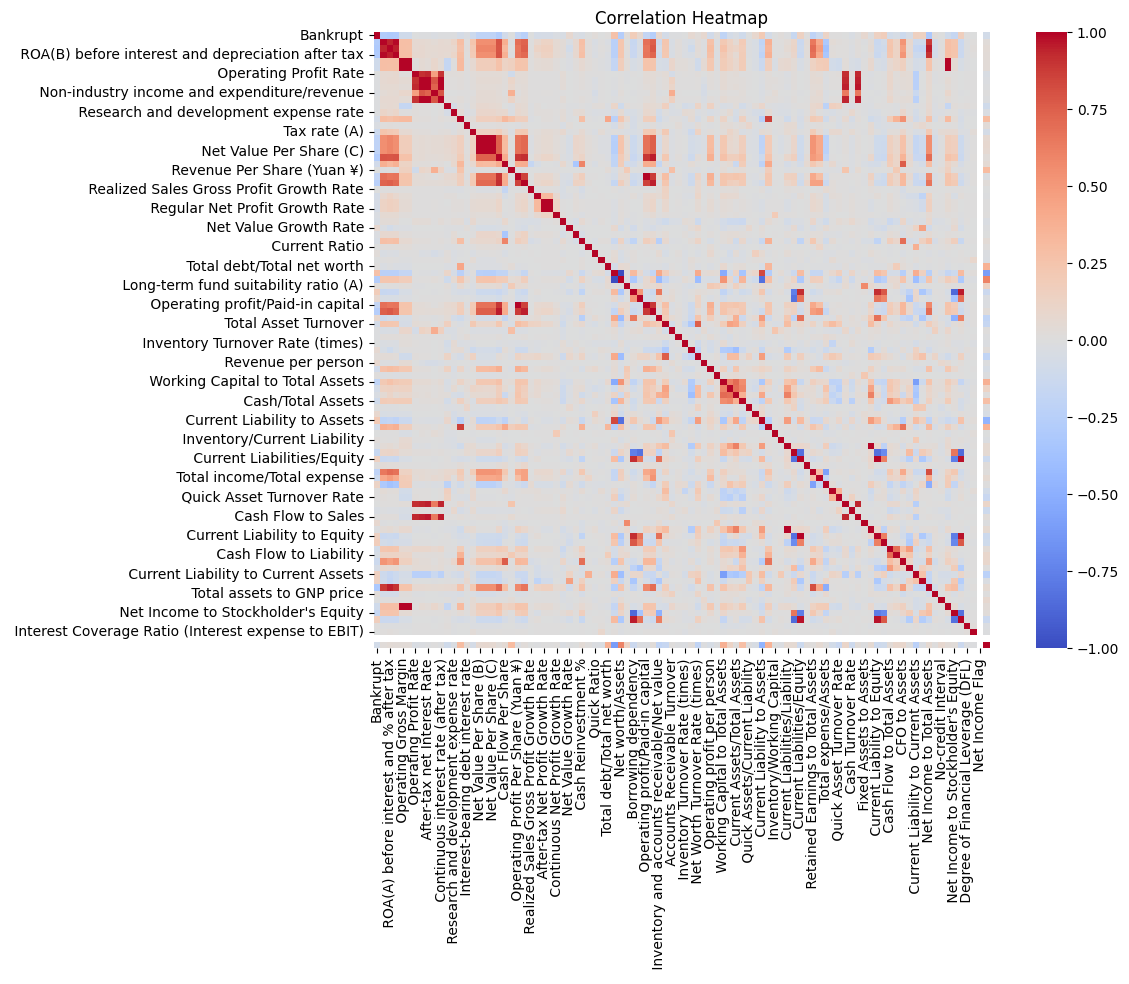

In [ ]:
# Plotting a heatmap of the correlation between remaining variables and the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=False,      # turn off numbers
    cbar=True,        # keep color bar for reference
    square=True       # makes blocks perfect squares
)
plt.title("Correlation Heatmap")
plt.show()


Highlighting the most correlated pairs (e.g., |corr| > 0.85). The highly correlated pairs are to be kept to acquire a result that matches the manual operation since they impact the target variabe. In the cases when the different variables make the same impact and keeping those variables make zero impact on the variable. The correlated variables can be removed.


In [ ]:
# Find highly correlated pairs
threshold = 0.85
pairs = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr.iloc[i, j]
        if abs(val) >= threshold:
            pairs.append((cols[i], cols[j], val))

high_corr_pairs = pd.DataFrame(pairs, columns=["feature_1","feature_2","corr"])                    .sort_values("corr", key=lambda s: s.abs(), ascending=False)
high_corr_pairs.head(20)


,feature_1,feature_2,corr
43,Current Liabilities/Liability,Current Liability to Liability,1.000000
45,Current Liabilities/Equity,Current Liability to Equity,1.000000
37,Debt ratio %,Net worth/Assets,-1.000000
7,Operating Gross Margin,Gross Profit to Sales,1.000000
6,Operating Gross Margin,Realized Sales Gross Margin,0.999631
8,Realized Sales Gross Margin,Gross Profit to Sales,0.999631
24,Net Value Per Share (B),Net Value Per Share (A),0.999587
26,Net Value Per Share (A),Net Value Per Share (C),0.999562
25,Net Value Per Share (B),Net Value Per Share (C),0.999148
36,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,0.998882


## 10) Feature Insights (EDA-based)


### Tasks
- List top features that differ clearly between Bankrupt and Non-Bankrupt
- Write 5–10 bullet insights with simple interpretation


**Top insights (write your final points here):**
1. Debt Ratio, Liability to Equity, Current Liabilities / Equity are strongest red flags in bankrupty prediction.
  
2. Operating Gross Margin, Realized Sales Gross Margin Bankrupt firms have very high leverage, often relying on short‑term liabilities to survive.

3. Net Value Per Share (A/B/C), Net Worth / Assets erosion is the late-stage distress signal
  
4. Interest rate and Return ratios defines the financial efficiency and debt burden of the firms. Healthy firms show a positive sign whereas the bankrupty ones struggle to generate returns.

5. Earnings power and growth stability, Operating Profit Per Share, Persistent EPS in Last Four Seasons varaibles predict the medium term collapse signal.



## 11) Recommendations


### Tasks
- Convert insights into practical recommendations (what signals to monitor, what actions to take)
- Mention any data limitations or next steps


**Recommendations (write here):**
- Reducing the credit lines that require collateral and debt refinancing, simulating cash flows tighten the leverage signals   
- Evalute pricing strategy and engage management by asking for margin recovery plans to maintain profits.  
- Net interest rates are to be monitored to measure the copmany earnings to cover financing costs.


## 12) Optional: Model Readiness (Not Full Modeling)


You can optionally add:
- Train/test split strategy (especially if time-based)
- Baseline model idea (e.g., logistic regression)
- Metrics you would use (PR-AUC/F1 if imbalanced)


In [ ]:
# TODO (optional)
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=[TARGET_COL])
# y = df[TARGET_COL]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## 13) Final Submission Checklist


✅ Notebook with:
- Data loading + overview  
- Missing/duplicates handling decisions  
- Univariate + bivariate analysis  
- Outlier + correlation analysis  
- 5–10 insights + recommendations  

✅ Clean plots with titles/labels  
✅ Clear comments + explanations
